In [1]:
# fetch the MNIST dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

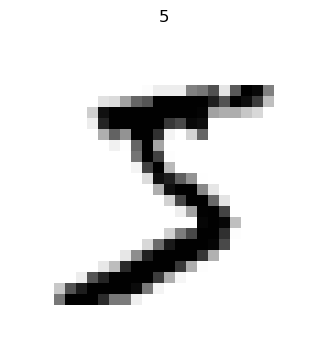

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.title(y[0])
plt.axis("off")
plt.show()

In [4]:
y[0]

'5'

In [5]:
import numpy as np
y = y.astype(np.uint8)

In [6]:
y[0]

5

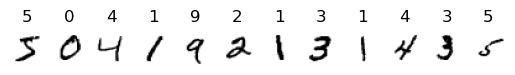

In [7]:
fig, ax = plt.subplots(1,12)
for i in range(12):
    sample = X[i].reshape(28, 28)
    ax[i].imshow(sample, cmap='binary')
    ax[i].axis("off")
    ax[i].set_title(y[i])

In [8]:
X_train, Xtest, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring='accuracy', n_jobs=-1)

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [17]:
y_train_prefect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_prefect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [19]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [22]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [23]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [24]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [25]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [26]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

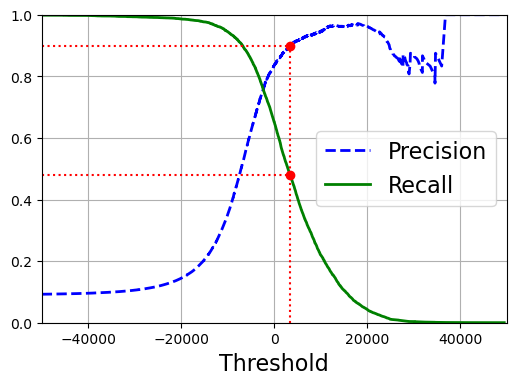

In [27]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(6, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                                        
plt.show()

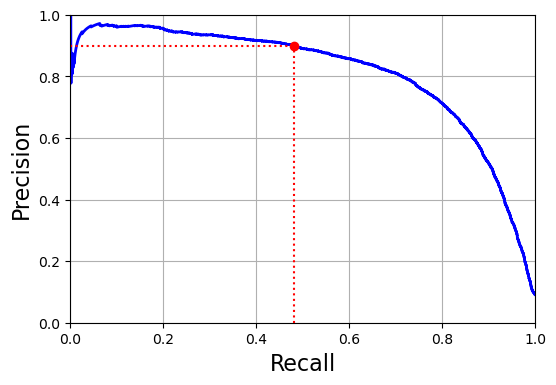

In [28]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(6, 4))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [29]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [30]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90)

(0.9000345901072293, 0.4799852425751706)

In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

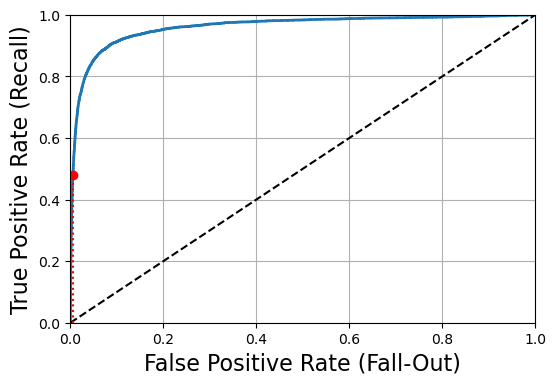

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)                                           

plt.figure(figsize=(6, 4))                                   
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
plt.plot([fpr_90], [recall_90_precision], "ro")                                              
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [35]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

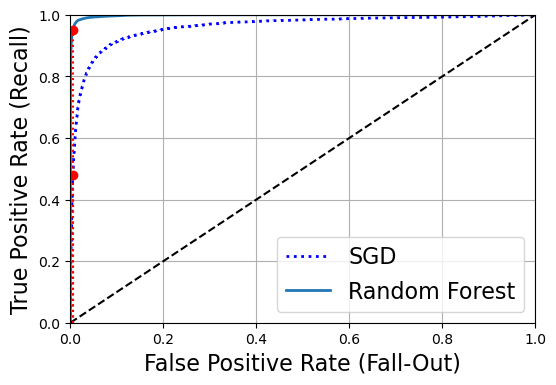

In [36]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [37]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [39]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest), recall_score(y_train_5, y_train_pred_forest)

(0.9905083315756169, 0.8662608374838591)

In [40]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [44]:
some_digit_scores = svm_clf.decision_function([some_digit]);
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [45]:
np.argmax(some_digit_scores)

5

In [47]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [48]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SVC())
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC())

In [49]:
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [51]:
len(ovo_clf.estimators_)

45

# Exercises

## Task 1

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': list(range(1, 16, 2)),
    'weights': ['uniform', 'distance']
}
KNN_clf = KNeighborsClassifier(n_jobs=True)

In [62]:
GS_KNN_clf = GridSearchCV(KNN_clf, params, cv=5)
GS_KNN_clf

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=True),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [63]:
GS_KNN_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=True),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [75]:
GS_KNN_clf.best_score_

0.9711166666666665

In [69]:
y_predict_task1 = GS_KNN_clf.best_estimator_.predict(Xtest)

In [70]:
confusion_matrix(y_test, y_predict_task1)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [   9,    7,  997,    2,    0,    0,    1,   14,    2,    0],
       [   0,    1,    4,  975,    1,   13,    1,    7,    4,    4],
       [   0,    5,    0,    0,  948,    0,    5,    4,    1,   19],
       [   4,    1,    0,   12,    2,  860,    5,    1,    3,    4],
       [   4,    3,    0,    0,    4,    3,  944,    0,    0,    0],
       [   0,   18,    4,    0,    2,    0,    0,  994,    0,   10],
       [   7,    0,    3,   13,    5,   11,    3,    4,  923,    5],
       [   3,    4,    2,    7,    9,    4,    1,    8,    2,  969]],
      dtype=int64)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_task1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.95      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_task1)

0.9717

## Task 2

In [77]:
from scipy.ndimage.interpolation import shift

In [79]:
def shift_image(img, dx=1, dy=1):
    img = img.reshape((28, 28))
    shifted_img = shift(img,[dy, dx], cval=0, mode="constant")
    return shifted_img.reshape([-1])

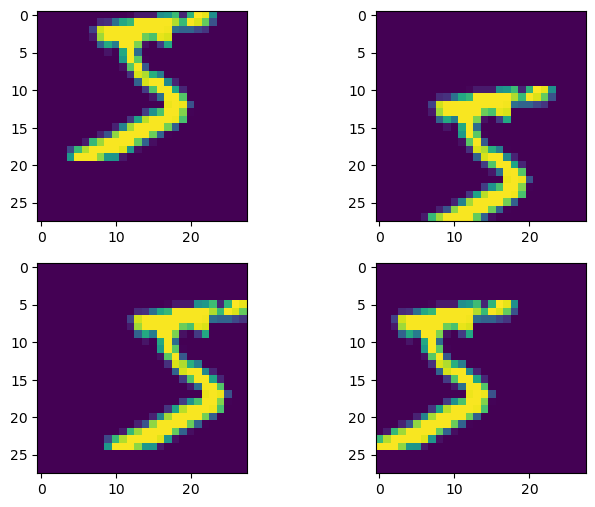

In [113]:
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.imshow(shift_image(some_digit, 0, -5).reshape((28, 28)))
plt.subplot(222)
plt.imshow(shift_image(some_digit, 0, 5).reshape((28, 28)))
plt.subplot(223)
plt.imshow(shift_image(some_digit, 5, 0).reshape((28, 28)))
plt.subplot(224)
plt.imshow(shift_image(some_digit, -5, 0).reshape((28, 28)))

In [114]:
# Augmentation, shift each image to up, down, left, and right by one pixel

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

shifted_directions = (
    (1, 0),
    (-1, 0),
    (0, 1),
    (0, -1)
)

for dx, dy in shifted_directions:
    for image, label in zip(X_train, y_train):
        shifted_image = shift_image(image, dx, dy)
        X_train_augmented.append(shifted_image)
        y_train_augmented.append(label)
        
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [118]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [122]:
knn_clf = KNeighborsClassifier(**GS_KNN_clf.best_params_)

In [123]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [137]:
y_pred = knn_clf.predict(Xtest)

In [138]:
accuracy_score(y_test, y_pred)

0.9763

In [139]:
confusion_matrix(y_test, y_pred)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1132,    2,    0,    1,    0,    0,    0,    0,    0],
       [   5,    2, 1006,    2,    2,    0,    2,   12,    1,    0],
       [   0,    2,    2,  983,    1,   10,    0,    6,    4,    2],
       [   1,    4,    0,    0,  951,    0,    4,    3,    0,   19],
       [   2,    2,    0,    9,    0,  867,    5,    1,    3,    3],
       [   5,    4,    0,    0,    2,    2,  945,    0,    0,    0],
       [   0,   18,    3,    0,    3,    0,    0,  997,    0,    7],
       [   6,    0,    2,    9,    4,    9,    3,    3,  933,    5],
       [   1,    4,    1,    5,    6,    5,    1,   10,    1,  975]],
      dtype=int64)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      1.00      0.98      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.99      0.96      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

